#ML project

In [56]:
import pandas as pd
try:
    df_orginal = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
    display(df_orginal)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [57]:
df=df_orginal.copy()
print("Missing values per column (before):")
print(df.isnull().sum())

if df['Sleep Disorder'].isnull().sum() > 0:
    df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0], inplace=True)

print("\nMissing values per column (after):")
print(df.isnull().sum())

Missing values per column (before):
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Missing values per column (after):
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


/tmp/ipython-input-1659285841.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0], inplace=True)


In [58]:
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


In [59]:
from sklearn.preprocessing import LabelEncoder

# Make a copy so the original df remains unchanged
df_encoded = df.copy() # No longer needed for this approach
encode_cols = ["Occupation", "BMI Category", "Sleep Disorder", "Gender"] # No longer needed for this approach

# Apply Label Encoding (removed as OneHotEncoder in pipeline handles encoding)
le = LabelEncoder()
for col in encode_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Show first 5 rows of the transformed dataset (no longer needed for this approach)
print(df_encoded.head())

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       1   27           9             6.1                 6   
1          2       1   28           1             6.2                 6   
2          3       1   28           1             6.2                 6   
3          4       1   28           6             5.9                 4   
4          5       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category Blood Pressure  \
0                       42             6             3         126/83   
1                       60             8             0         125/80   
2                       60             8             0         125/80   
3                       30             8             2         140/90   
4                       30             8             2         140/90   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               1  
1          75       

In [60]:
display(df);

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [61]:
sleep_disorder_column = df['Sleep Disorder']
display(sleep_disorder_column)

,Sleep Disorder
0,Sleep Apnea
1,Sleep Apnea
2,Sleep Apnea
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [62]:
# Drop ID and target from features
X = df.drop(columns=["Sleep Disorder", "Person ID"])

# Target column
y = df["Sleep Disorder"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(y.value_counts())   # to check class distribution


Features shape: (374, 11)
Target shape: (374,)
Sleep Disorder
Sleep Apnea    297
Insomnia        77
Name: count, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##model training and evulation

=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.98      0.97      0.97        60

    accuracy                           0.96        75
   macro avg       0.93      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



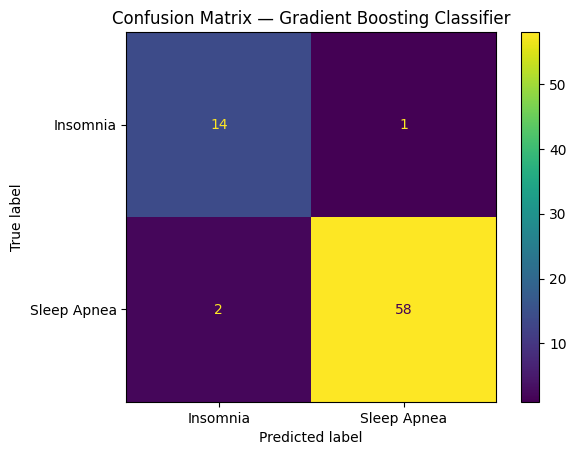


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531

Saved model -> sleep_gbc_model.joblib


In [64]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


numeric_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

categorical_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical values
    ("oh", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical features
])

preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])


gbc = Pipeline([
    ("pre", preprocess),  # Apply preprocessing to data
    ("clf", GradientBoostingClassifier(n_estimators=200, random_state=42))  # Gradient Boosting Classifier
])

gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)

print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

feature_importance = gbc.named_steps["clf"].feature_importances_

ohe = preprocessor.named_transformers_['cat'].named_steps['oh']
fitted_cat_cols = preprocessor.transformers_[1][2]
cat_feature_names = ohe.get_feature_names_out(fitted_cat_cols)
fitted_num_cols = preprocessor.transformers_[0][2]
feat_names = np.concatenate([fitted_num_cols, cat_feature_names])

fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))


joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")

In [65]:
import joblib, pandas as pd, numpy as np
model = joblib.load("sleep_gbc_model.joblib")

expected_cols = list(model.named_steps["pre"].get_feature_names_out())
print("Expected columns:\n", expected_cols)

new_data_raw = {
    "Gender": "Male",                 # string
    "Age": 35,
    "Occupation": "Software Engineer",# string
    "Sleep Duration": 6.2,
    "Quality of Sleep": 6,
    "Physical Activity Level": 42,
    "Stress Level": 6,
    "BMI Category": "Overweight",     # string
    "Systolic": 126,                # Added Systolic
    "Diastolic": 83,                 # Added Diastolic
    "Heart Rate": 77,
    "Daily Steps": 4200
}
new_df = pd.DataFrame([new_data_raw])
original_input_cols = model.named_steps["pre"].feature_names_in_

# Add any missing columns in new_df with NaN (shouldn't happen if new_data_raw is correct)
for col in original_input_cols:
    if col not in new_df.columns:
        new_df[col] = np.nan

# Reindex new_df to match the original input column order
new_df = new_df[original_input_cols]


# 5) প্রেডিক্ট
pred = model.predict(new_df)
print("Predicted Sleep Disorder:", pred[0])

Expected columns:
 ['num__Age', 'num__Sleep Duration', 'num__Quality of Sleep', 'num__Physical Activity Level', 'num__Stress Level', 'num__Heart Rate', 'num__Daily Steps', 'cat__Gender_Female', 'cat__Gender_Male', 'cat__Occupation_Accountant', 'cat__Occupation_Doctor', 'cat__Occupation_Engineer', 'cat__Occupation_Lawyer', 'cat__Occupation_Manager', 'cat__Occupation_Nurse', 'cat__Occupation_Sales Representative', 'cat__Occupation_Salesperson', 'cat__Occupation_Scientist', 'cat__Occupation_Software Engineer', 'cat__Occupation_Teacher', 'cat__BMI Category_Normal', 'cat__BMI Category_Normal Weight', 'cat__BMI Category_Obese', 'cat__BMI Category_Overweight', 'cat__Blood Pressure_115/75', 'cat__Blood Pressure_115/78', 'cat__Blood Pressure_117/76', 'cat__Blood Pressure_118/75', 'cat__Blood Pressure_119/77', 'cat__Blood Pressure_120/80', 'cat__Blood Pressure_122/80', 'cat__Blood Pressure_125/80', 'cat__Blood Pressure_125/82', 'cat__Blood Pressure_126/83', 'cat__Blood Pressure_128/84', 'cat__Bl

=== Random Forest — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.78      0.93      0.85        15
 Sleep Apnea       0.98      0.93      0.96        60

    accuracy                           0.93        75
   macro avg       0.88      0.93      0.90        75
weighted avg       0.94      0.93      0.94        75



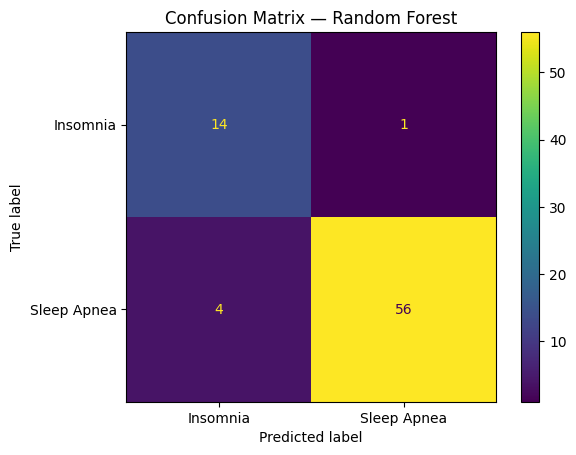


Top 15 features:
                 feature  importance
         Sleep Duration    0.178242
Physical Activity Level    0.114108
            Daily Steps    0.113434
                    Age    0.106975
    BMI Category_Normal    0.068993
BMI Category_Overweight    0.066442
       Quality of Sleep    0.044071
           Stress Level    0.040467
             Heart Rate    0.031512
  Blood Pressure_135/90    0.027896
 Occupation_Salesperson    0.027470
     Occupation_Teacher    0.023550
  Blood Pressure_130/85    0.022317
       Occupation_Nurse    0.015706
      Occupation_Doctor    0.014110

Saved model -> sleep_rf_model.joblib


In [66]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt


# Drop ID and target from features
X = df.drop(columns=["Sleep Disorder", "Person ID"])

# Target column
y = df["Sleep Disorder"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numerical and categorical columns in the training data
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines for numerical and categorical features
numeric_tf = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
categorical_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing steps
preprocess = ColumnTransformer([("num", numeric_tf, num_cols), ("cat", categorical_tf, cat_cols)])

# Train model
rf = Pipeline([("pre", preprocess), ("clf", RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced_subsample"))])
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print("=== Random Forest — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Random Forest")
plt.show()

# Feature importance
try:
    ohe = rf.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]
    cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])
    feat_names = np.concatenate([np.array(num_cols), cat_names])
    importances = rf.named_steps["clf"].feature_importances_
    fi = pd.DataFrame({"feature": feat_names, "importance": importances})
    fi = fi.sort_values("importance", ascending=False).head(15)
    print("\nTop 15 features:\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)

joblib.dump(rf, "sleep_rf_model.joblib")
print("\nSaved model -> sleep_rf_model.joblib")

In [67]:

import joblib
joblib.dump(list(X.columns), "expected_columns.joblib")
expected_cols = joblib.load("expected_columns.joblib")


=== SVM — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
 Sleep Apnea       0.97      0.98      0.98        60

    accuracy                           0.96        75
   macro avg       0.95      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



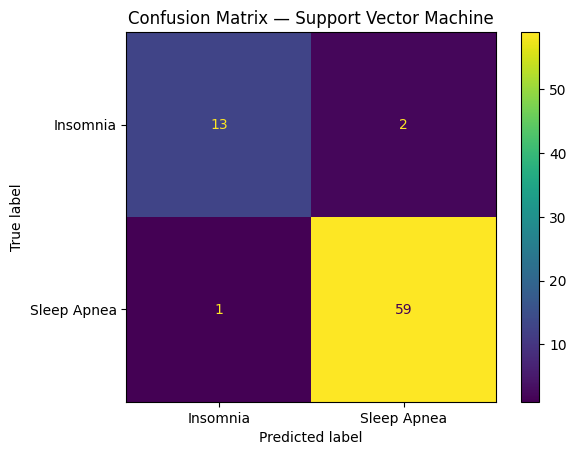

Feature-importance listing skipped: 'csr_matrix' object has no attribute 'flatten'

Saved model -> sleep_svm_model.joblib


In [68]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you would need to add the data splitting code here as well.
# For now, assuming they are available from previous cells.

# Identify numerical and categorical columns in the training data
# These should be consistent with how X_train was created
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines for numerical and categorical features
numeric_tf = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
categorical_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing steps
preprocess = ColumnTransformer([("num", numeric_tf, num_cols), ("cat", categorical_tf, cat_cols)])

# Train the Support Vector Machine (SVM) model
# Using a linear kernel for feature importance analysis later
svm = Pipeline([("pre", preprocess), ("clf", SVC(kernel="linear", random_state=42))])

# Train the model
svm.fit(X_train, y_train)

# Evaluate model
y_pred = svm.predict(X_test)
print("=== SVM — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()

# Feature importance (after fitting the model)
try:
    # Access the OneHotEncoder after the model is trained
    ohe = svm.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

    # Get the feature names after fitting the OneHotEncoder
    # Access the fitted column names from the ColumnTransformer
    fitted_cat_cols = svm.named_steps['pre'].transformers_[1][2]
    cat_names = ohe.get_feature_names_out(fitted_cat_cols) if len(fitted_cat_cols) else np.array([])

    # Combine numerical and categorical feature names
    # Access the fitted numerical column names from the ColumnTransformer
    fitted_num_cols = svm.named_steps['pre'].transformers_[0][2]
    feat_names = np.concatenate([np.array(fitted_num_cols), cat_names])


    # Get feature importance for SVM with linear kernel
    feature_importance = svm.named_steps["clf"].coef_.flatten()

    # Create a DataFrame for feature importance
    fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})

    # Sort and print the top 15 important features based on absolute values
    fi['abs_importance'] = fi['importance'].abs()
    fi = fi.sort_values("abs_importance", ascending=False).head(15).drop(columns='abs_importance')


    print("\nTop 15 features (based on absolute coefficient values):\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)

# Save the model
joblib.dump(svm, "sleep_svm_model.joblib")
print("\nSaved model -> sleep_svm_model.joblib")

=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.98      0.97      0.97        60

    accuracy                           0.96        75
   macro avg       0.93      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



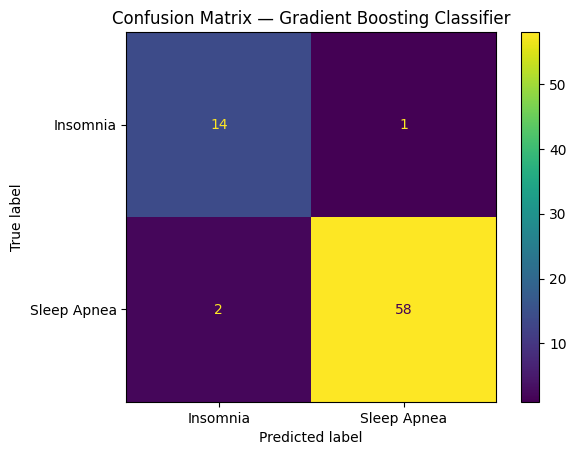


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531

Saved model -> sleep_gbc_model.joblib


In [69]:
# Train the model first
gbc.fit(X_train, y_train)

# Evaluate the model
y_pred = gbc.predict(X_test)
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

# Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Now, the OneHotEncoder has been fitted, so you can retrieve feature names for categorical columns
ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

# Retrieve feature names for the categorical columns
cat_names = list(ohe.get_feature_names_out(cat_cols))

# Combine numerical and categorical feature names
feat_names = np.concatenate([num_cols, cat_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))

# Save the model to a file
joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


Data types in X_train before ColumnTransformer:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
dtype: object

Identified numerical columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Identified categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.98      0.97      0.97        60

    accuracy                           0.96        75
   macro avg       0.93      0.95 

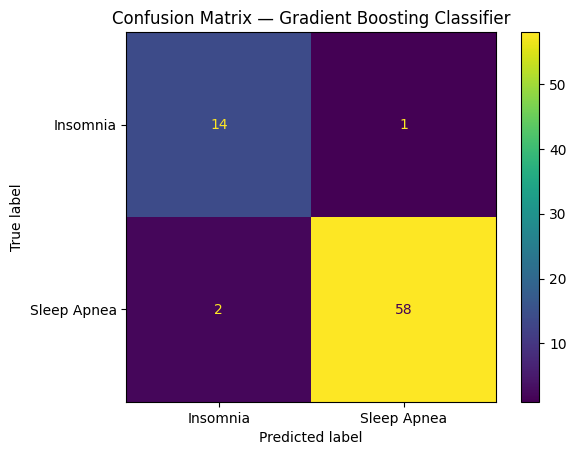


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531

Saved model -> sleep_gbc_model.joblib


In [70]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with initial handling of missing 'Sleep Disorder' values
# and 'Systolic' and 'Diastolic' columns added from 'Blood Pressure'

# Drop 'Person ID' and the target variable 'Sleep Disorder' from the features
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns in the training data
# Explicitly check dtypes in X_train
print("Data types in X_train before ColumnTransformer:")
print(X_train.dtypes)

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Ensure cat_cols are the actual column names in X_train that are objects or strings
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nIdentified numerical columns:", num_cols)
print("Identified categorical columns:", cat_cols)


# Preprocess and train model
# Numeric pipeline (impute and scale)
numeric_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),  # Handle missing values
    ("sc", StandardScaler())  # Standardize numerical features
])

# Categorical pipeline (impute and one-hot encode)
categorical_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical values
    ("oh", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical features
])

# Preprocessing step to combine both numerical and categorical transformations
preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

# Train the Gradient Boosting Classifier (GBC) model
gbc = Pipeline([
    ("pre", preprocess),  # Apply preprocessing to data
    ("clf", GradientBoostingClassifier(n_estimators=200, random_state=42))  # Gradient Boosting Classifier
])

# 7. Fit the model to the training data
gbc.fit(X_train, y_train)

# 8. Evaluate the model
y_pred = gbc.predict(X_test)

# Print the classification report
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

# 9. Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Get feature names from the one-hot encoder for categorical columns
# Access the preprocessor step from the pipeline
preprocessor = gbc.named_steps['pre']

# Get the fitted OneHotEncoder from the categorical transformer
ohe = preprocessor.named_transformers_['cat'].named_steps['oh']

# Get the feature names for the categorical columns from the fitted OneHotEncoder
# Retrieve the fitted column names from the ColumnTransformer
fitted_cat_cols = preprocessor.transformers_[1][2] # Index 1 is the 'cat' transformer


# Get the feature names for the categorical columns using the fitted encoder
cat_feature_names = ohe.get_feature_names_out(fitted_cat_cols)


# Combine numerical and categorical feature names
# Get the numerical column names from the fitted ColumnTransformer
# Note: ColumnTransformer.transformers_ stores the actual columns used after fitting
fitted_num_cols = preprocessor.transformers_[0][2] # Index 0 is the 'num' transformer


feat_names = np.concatenate([fitted_num_cols, cat_feature_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
# Ensure sorting is applied correctly
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))

# 10. Save the model to a file
joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531


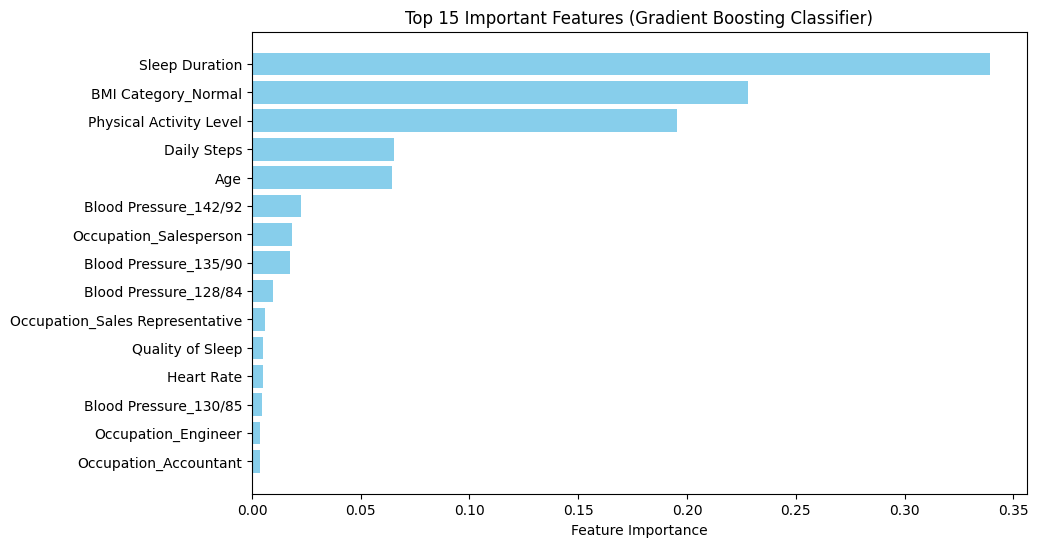

In [71]:
# Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Get feature names from the one-hot encoder for categorical columns
ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

# Retrieve feature names for the categorical columns
cat_names = list(ohe.get_feature_names_out(cat_cols))

# Combine numerical and categorical feature names
feat_names = np.concatenate([num_cols, cat_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

# Print the top 15 important features
print("\nTop 15 features:\n", fi.to_string(index=False))

# Bar Chart for Feature Importance
plt.figure(figsize=(10,6))
plt.barh(fi['feature'], fi['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features (Gradient Boosting Classifier)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()
